In [1]:
#importing necessary modules
import datetime
import pandas as pd
import numpy as np
import xarray as xr
import metpy.calc
from metpy.units import units
from metpy.plots import USCOUNTIES

import seaborn as sn

%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeature


import matplotlib.pyplot as plt
from scipy.stats import zscore
 
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Link to datafile: https://drive.google.com/file/d/1kjzuaNx7G6EmjFbIToN6DitoZnbmfy9V/view?usp=sharing
#Link to repository: 
# Open the netCDF file as a xarray Dataset
dataX = xr.open_dataset('C:\\Users\\Dell\\Documents\\BD final proj\\projdata1.nc4', decode_times = False)

# View a summary of the Dataset
dataX

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 36, lon: 84, time: 1248)
Coordinates:
  * lat       (lat) float64 71.25 70.75 70.25 69.75 ... 55.25 54.75 54.25 53.75
  * lon       (lon) float64 -170.2 -169.8 -169.2 -168.8 ... -129.8 -129.2 -128.8
  * time      (time) int32 0 1 2 3 4 5 6 ... 1241 1242 1243 1244 1245 1246 1247
Dimensions without coordinates: bnds
Data variables:
    irrx      (time, lat, lon) float32 ...
    lat_bnds  (lat, bnds) float64 ...
    lon_bnds  (lon, bnds) float64 ...
    petx      (time, lat, lon) float32 ...
    pptx      (time, lat, lon) float32 ...
    tmin      (time, lat, lon) float32 ...
    tmax      (time, lat, lon) float32 ...
    rhum      (time, lat, lon) float32 ...
    srad      (time, lat, lon) float32 ...
    vpxx      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        CGCM1 scenario. mean monthly irradiance from Canadian Clima...
    institution:  National Center for Atmospheric Research
    project:      Vegetation/Ecosystem Modeling and Analysis Project (VEMAP)
    contact:      P.O. Box 3000 Boulder, CO 80307-3000. Phone: (303) 497- 1000
    source:       CCCma-CGCM1 model

In [3]:
dataX.attrs['Start Date'] = '1997-01-01'
dataX['time'] = pd.date_range(start='1/01/1997', periods=dataX.sizes['time'], freq='MS')
dataX["time"].dt.strftime("%Y-%m-%d")
dataX

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 36, lon: 84, time: 1248)
Coordinates:
  * lat       (lat) float64 71.25 70.75 70.25 69.75 ... 55.25 54.75 54.25 53.75
  * lon       (lon) float64 -170.2 -169.8 -169.2 -168.8 ... -129.8 -129.2 -128.8
  * time      (time) datetime64[ns] 1997-01-01 1997-02-01 ... 2100-12-01
Dimensions without coordinates: bnds
Data variables:
    irrx      (time, lat, lon) float32 ...
    lat_bnds  (lat, bnds) float64 71.5 71.0 71.0 70.5 ... 54.5 54.0 54.0 53.5
    lon_bnds  (lon, bnds) float64 -170.5 -170.0 -170.0 ... -129.0 -129.0 -128.5
    petx      (time, lat, lon) float32 ...
    pptx      (time, lat, lon) float32 ...
    tmin      (time, lat, lon) float32 ...
    tmax      (time, lat, lon) float32 ...
    rhum      (time, lat, lon) float32 ...
    srad      (time, lat, lon) float32 ...
    vpxx      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.0
    title:        CGCM1 scenario. mean monthly irradiance from Canadian Clima...
    institution:  National Center for Atmospheric Research
    project:      Vegetation/Ecosystem Modeling and Analysis Project (VEMAP)
    contact:      P.O. Box 3000 Boulder, CO 80307-3000. Phone: (303) 497- 1000
    source:       CCCma-CGCM1 model
    Start Date:   1997-01-01

In [4]:
#Converting Data to Pandas
data1 = dataX.to_dataframe()

In [5]:
#Renaming the column Headers
data = data1.rename(columns = {'lat':'Latitude', 'lon':'Longitude', 'irrx':'Irradiation','pptx':'Precipitation','tmin':'Min_Temp','tmax':'Max_Temp','rhum':'Relative_Humidity', 'petx': 'Potential Evapotranspiration','vpxx':'Vapor_Pressure', 'srad':'Solar_Radiation', 'pptx':'Precipitation'})

In [6]:
#Removing the unneeded columns from data
data.drop(['Potential Evapotranspiration','lat_bnds','lon_bnds'], axis = 1, inplace = True)

In [7]:
#Dropping NaN values
data = data.dropna()

In [8]:
data

Irradiation  Precipitation   Min_Temp  \
bnds lat   lon     time                                                
0    71.25 -156.75 1997-01-01     0.020690      22.766439 -24.069483   
                   1997-02-01    10.906767       8.011784 -26.625763   
                   1997-03-01   116.899345      13.273505 -28.469589   
                   1997-04-01   245.867661       5.970510 -27.356468   
                   1997-05-01   106.681755       5.084956  -9.137223   
...                                    ...            ...        ...   
1    53.75 -166.75 2100-08-01   329.218628      70.250221  13.117846   
                   2100-09-01   257.476685     204.811478  10.616543   
                   2100-10-01   161.955063     232.000687   6.845821   
                   2100-11-01   102.744270     230.464981   2.151087   
                   2100-12-01    51.744373     172.421616   2.084630   

                                Max_Temp  Relative_Humidity  Solar_Radiation  \
bnds lat   lon     time                                                        
0    71.25 -156.75 1997-01-01 -16.347624          62.089603         0.156222   
                   1997-02-01 -22.133951          72.114403       286.946442   
                   1997-03-01 -20.897623          58.534901      4834.741699   
                   1997-04-01 -11.623947          32.577370     14312.712891   
                   1997-05-01  -5.175585          58.283066      8741.326172   
...                                  ...                ...              ...   
1    53.75 -166.75 2100-08-01  19.315529          70.699043     17206.587891   
                   2100-09-01  16.842976          72.441734     11470.416992   
                   2100-10-01  12.920119          76.360062      5980.557129   
                   2100-11-01   9.873170          72.611328      3094.046143   
                   2100-12-01   7.718122          79.310646      1350.964844   

                               Vapor_Pressure  
bnds lat   lon     time                        
0    71.25 -156.75 1997-01-01      106.458366  
                   1997-02-01       88.648010  
                   1997-03-01       63.520851  
                   1997-04-01       62.337658  
                   1997-05-01      231.772751  
...                                       ...  
1    53.75 -166.75 2100-08-01     1394.431152  
                   2100-09-01     1214.069214  
                   2100-10-01     1021.652283  
                   2100-11-01      769.466736  
                   2100-12-01      740.886536  

[4288128 rows x 7 columns]

In [9]:
#Removing outliers from each columnn - if values are more than 2 std deviations from the mean, they will be removed
z = zscore(data)
abs_z = np.abs(z)
filtered_data = (abs_z < 2).all(axis=1)
dataA = data[filtered_data]

In [10]:
print('\nNumber of rows & columns, respectively:\n\n\tUnfiltered Data:',data1.shape, '\n\tFiltered Data:',dataA.shape,'\n\n\nNumber of Elements:\n\n\tUnfiltered Data:',data1.size,'\n\tFilteredData:',dataA.size)


Number of rows & columns, respectively:

	Unfiltered Data: (7547904, 10) 
	Filtered Data: (3642126, 7) 


Number of Elements:

	Unfiltered Data: 75479040 
	FilteredData: 25494882


In [11]:
DataA = dataA

In [12]:
DataA['Avg_Temp'] = (DataA['Min_Temp']+DataA['Max_Temp'])/2

In [13]:
DataA

Irradiation  Precipitation   Min_Temp  \
bnds lat   lon     time                                                
0    71.25 -156.75 1997-01-01     0.020690      22.766439 -24.069483   
                   1997-03-01   116.899345      13.273505 -28.469589   
                   1997-04-01   245.867661       5.970510 -27.356468   
                   1997-05-01   106.681755       5.084956  -9.137223   
                   1997-07-01   240.364380      20.119175   0.232107   
...                                    ...            ...        ...   
1    53.75 -166.75 2100-05-01   367.288971     211.386490   6.918592   
                   2100-06-01   381.429596      79.794182   9.692362   
                   2100-10-01   161.955063     232.000687   6.845821   
                   2100-11-01   102.744270     230.464981   2.151087   
                   2100-12-01    51.744373     172.421616   2.084630   

                                Max_Temp  Relative_Humidity  Solar_Radiation  \
bnds lat   lon     time                                                        
0    71.25 -156.75 1997-01-01 -16.347624          62.089603         0.156222   
                   1997-03-01 -20.897623          58.534901      4834.741699   
                   1997-04-01 -11.623947          32.577370     14312.712891   
                   1997-05-01  -5.175585          58.283066      8741.326172   
                   1997-07-01   6.417632          32.442295     20639.884766   
...                                  ...                ...              ...   
1    53.75 -166.75 2100-05-01  12.521426          74.821289     20804.146484   
                   2100-06-01  15.748724          72.924309     22986.414062   
                   2100-10-01  12.920119          76.360062      5980.557129   
                   2100-11-01   9.873170          72.611328      3094.046143   
                   2100-12-01   7.718122          79.310646      1350.964844   

                               Vapor_Pressure   Avg_Temp  
bnds lat   lon     time                                   
0    71.25 -156.75 1997-01-01      106.458366 -20.208553  
                   1997-03-01       63.520851 -24.683605  
                   1997-04-01       62.337658 -19.490208  
                   1997-05-01      231.772751  -7.156404  
                   1997-07-01      270.883423   3.324869  
...                                       ...        ...  
1    53.75 -166.75 2100-05-01      946.197083   9.720009  
                   2100-06-01     1135.642212  12.720543  
                   2100-10-01     1021.652283   9.882971  
                   2100-11-01      769.466736   6.012128  
                   2100-12-01      740.886536   4.901376  

[3642126 rows x 8 columns]

In [14]:
#Using Metpy to create new dataset
DataA['Heat_Index'] = metpy.calc.heat_index(DataA['Avg_Temp'].values*units.degC, DataA['Relative_Humidity'].values)
DataA['Dewpoint'] = metpy.calc.dewpoint(DataA['Vapor_Pressure'].values*units.pascal)
dataA = DataA
DataA = DataA.reset_index('time')


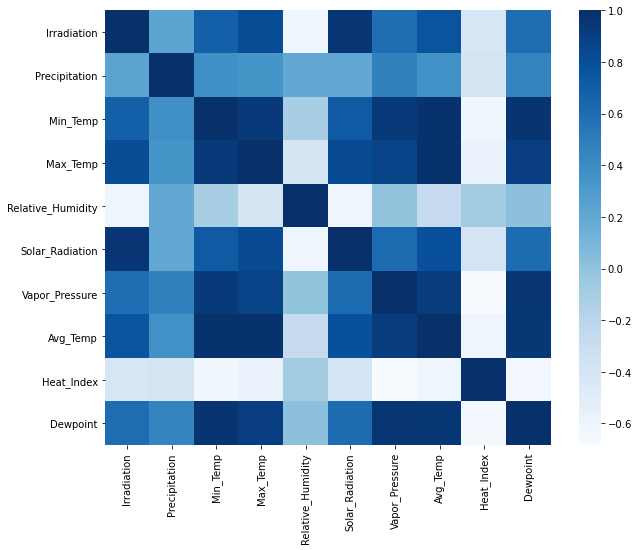

In [15]:
cor = DataA.corr()
plt.figure(figsize=(10, 8))
sn.heatmap(cor, annot = False, cmap = 'Blues')
plt.show()

In [16]:
DataAA = DataA.reset_index()
DataA2 = DataAA.groupby(['lat']).mean('Avg_Temp')
DataA2 = DataA2.reset_index()

In [17]:
#Converting Desired Variables to numpy so a cmap can be applied to the plot
hum =DataAA['Relative_Humidity'].to_numpy()
avg =DataAA['Avg_Temp'].to_numpy()
srad = DataAA['Solar_Radiation'].to_numpy()
irad = DataAA['Irradiation'].to_numpy()
prcp = DataAA['Precipitation'].to_numpy()
vpr = DataAA['Vapor_Pressure'].to_numpy()
dew = DataAA['Dewpoint'].to_numpy()
hi = DataAA['Heat_Index'].to_numpy()

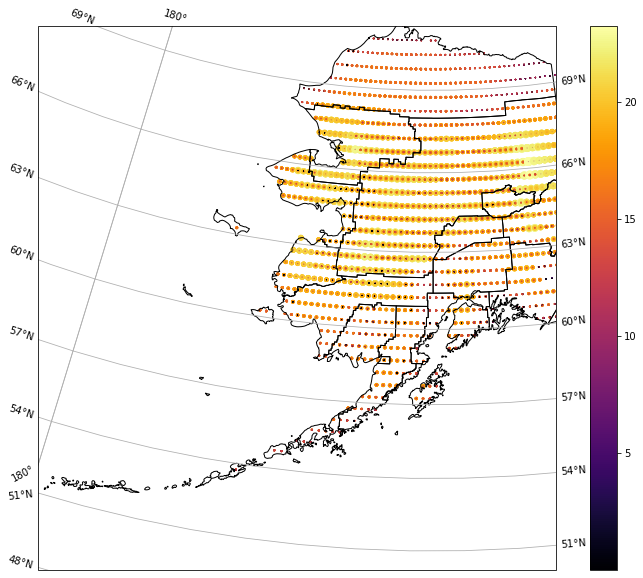

In [18]:
proj = ccrs.LambertConformal(central_longitude = -153, central_latitude = 65)
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1, projection = proj)
ax.set_extent([-179,-145,50,70],ccrs.Geodetic())
ax.add_feature(USCOUNTIES.with_scale('5m'))
at = ax.scatter(DataAA.lon, DataAA.lat, c = avg, cmap = 'inferno', transform = ccrs.PlateCarree(), s=(DataAA.Avg_Temp/15)**9.5)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(at, ax=ax)

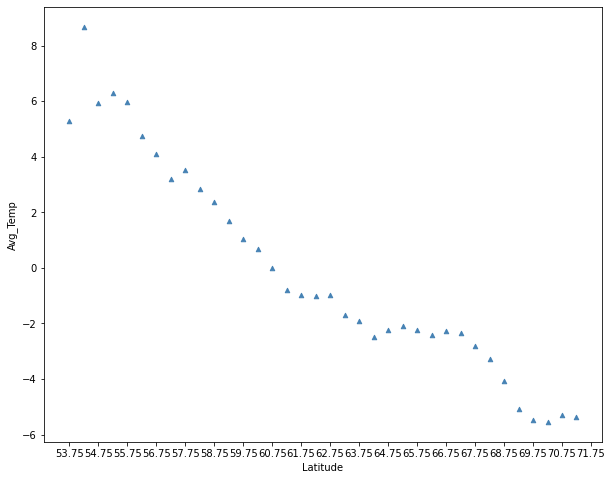

In [19]:
ax = plt.gca()
plt.xticks(np.arange(min(DataA2['lat']), max(DataA2['lat'])+1))
DataA2.plot(kind='scatter',x='lat',y='Avg_Temp', color='steelblue', marker = '^',ax=ax, figsize = (10,8))
plt.xlabel("Latitude")
plt.show()

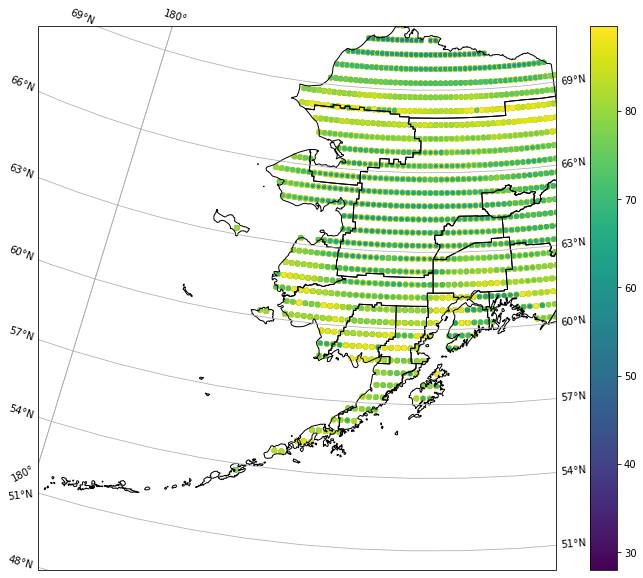

In [20]:
fig2 = plt.figure(figsize = (12,10))
ax = fig2.add_subplot(1,1,1, projection = proj)
ax.set_extent([-179,-145,50,70],ccrs.Geodetic())
ax.add_feature(USCOUNTIES.with_scale('5m'))
rh = ax.scatter(DataAA.lon, DataAA.lat, c = hum, cmap = "viridis", transform = ccrs.PlateCarree(), s=(DataAA.Relative_Humidity/20)**2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(rh, ax=ax)

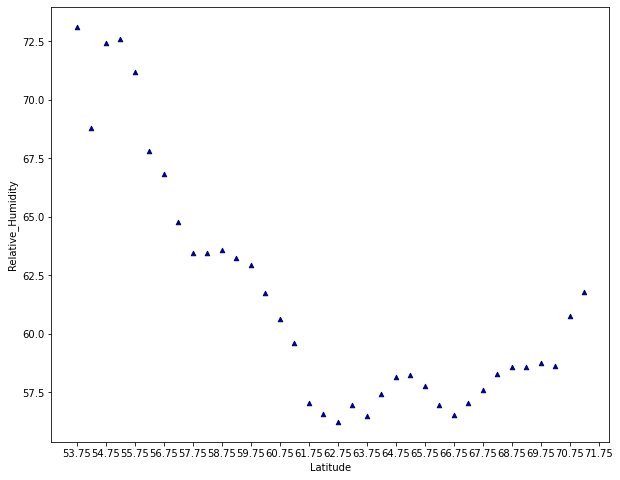

In [21]:
ax = plt.gca()
plt.xticks(np.arange(min(DataA2['lat']), max(DataA2['lat'])+1))
DataA2.plot(kind='scatter',x='lat',y='Relative_Humidity', color='navy', marker = '^',ax=ax, figsize = (10,8))
plt.xlabel("Latitude")
plt.show()

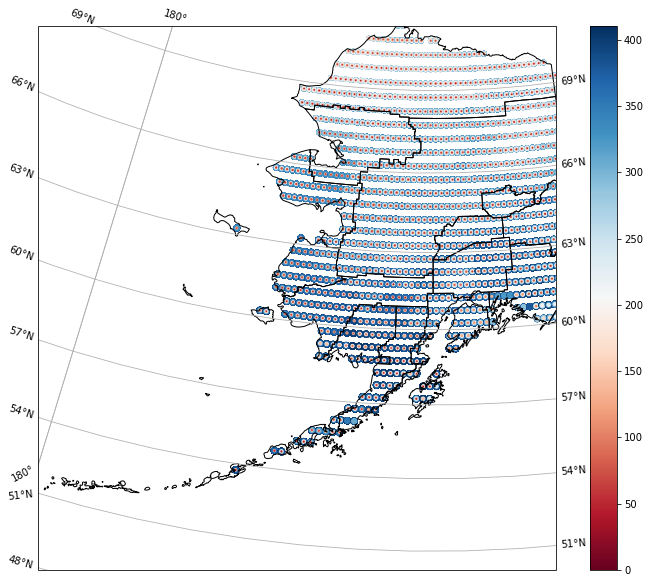

In [49]:
fig3 = plt.figure(figsize = (12,10))
ax = fig3.add_subplot(1,1,1, projection = proj)
ax.set_extent([-179,-145,50,70],ccrs.Geodetic())
ax.add_feature(USCOUNTIES.with_scale('5m'))
ir = ax.scatter(DataAA.lon, DataAA.lat, c = irad, cmap = "RdBu", transform = ccrs.PlateCarree(), s=(DataAA.Irradiation/65)**2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(ir, ax=ax)

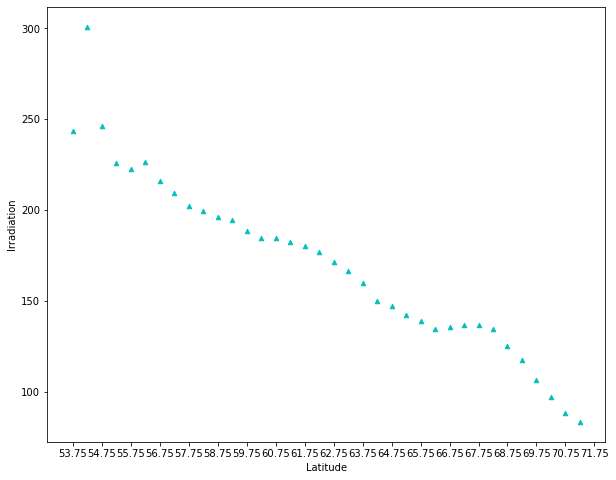

In [23]:
ax = plt.gca()
plt.xticks(np.arange(min(DataA2['lat']), max(DataA2['lat'])+1))
DataA2.plot(kind='scatter',x='lat',y='Irradiation', color='c', marker = '^',ax=ax, figsize = (10,8))
plt.xlabel("Latitude")
plt.show()

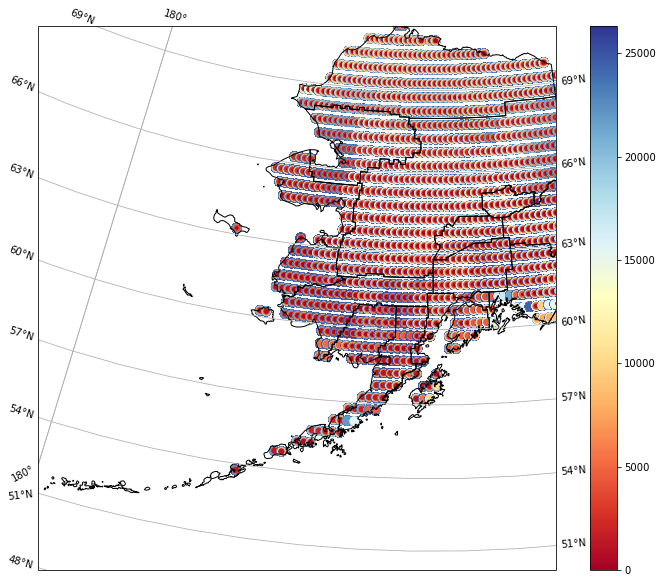

In [24]:
fig4 = plt.figure(figsize = (12,10))
ax = fig4.add_subplot(1,1,1, projection = proj)
ax.set_extent([-179,-145,50,70],ccrs.Geodetic())
ax.add_feature(USCOUNTIES.with_scale('5m'))
sr = ax.scatter(DataAA.lon, DataAA.lat, c = srad, cmap = "RdYlBu", transform = ccrs.PlateCarree(), s=(DataAA.Solar_Radiation**.35)**1.25)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(sr, ax=ax)

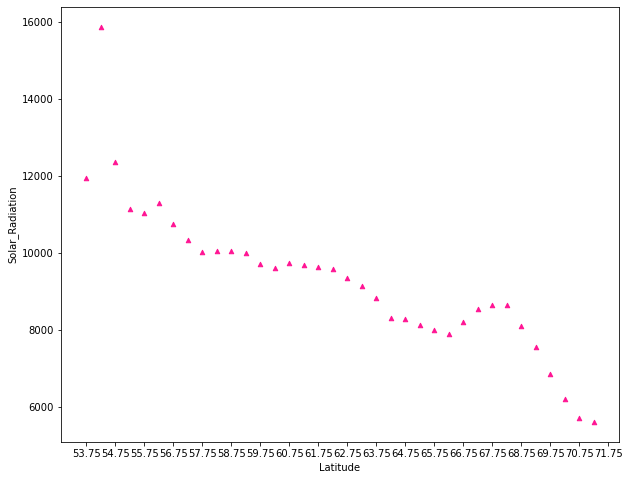

In [25]:
ax = plt.gca()
plt.xticks(np.arange(min(DataA2['lat']), max(DataA2['lat'])+1))
DataA2.plot(kind='scatter',x='lat',y='Solar_Radiation', color='deeppink', marker = '^', ax=ax, figsize = (10,8))
plt.xlabel("Latitude")
plt.show()

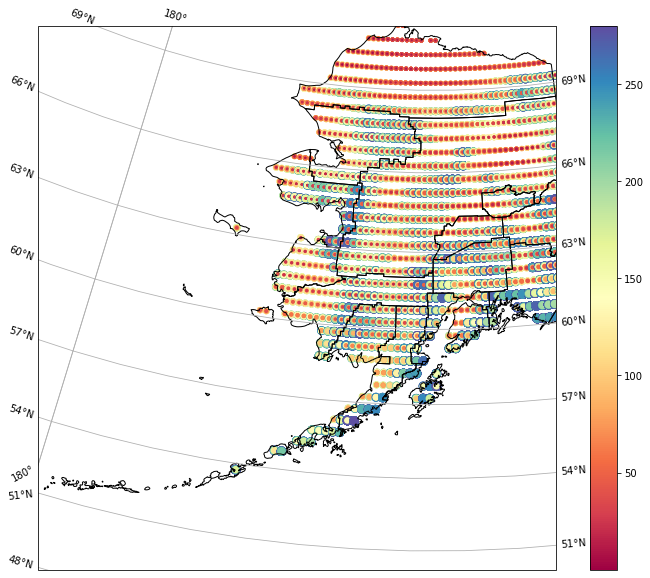

In [26]:
fig5 = plt.figure(figsize = (12,10))
ax = fig5.add_subplot(1,1,1, projection = proj)
ax.set_extent([-179,-145,50,70],ccrs.Geodetic())
ax.add_feature(USCOUNTIES.with_scale('5m'))
sr = ax.scatter(DataAA.lon, DataAA.lat, c = prcp, cmap = "Spectral", transform = ccrs.PlateCarree(), s = (DataAA.Precipitation/9)**1.25)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(sr, ax=ax)

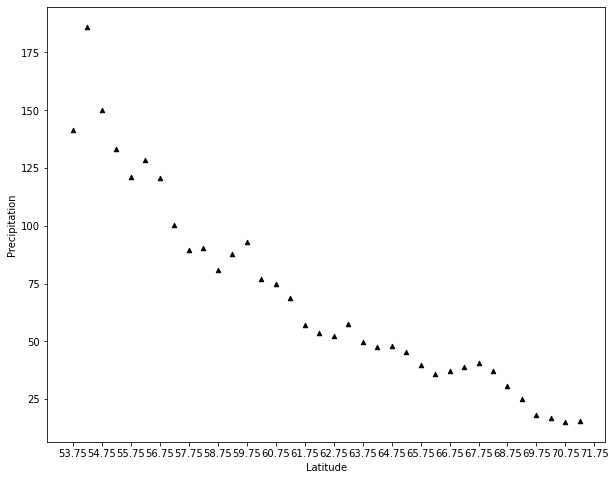

In [27]:
ax = plt.gca()
plt.xticks(np.arange(min(DataA2['lat']), max(DataA2['lat'])+1))
DataA2.plot(kind='scatter',x='lat',y='Precipitation', color='k', marker = '^',ax=ax, figsize = (10,8))
plt.xlabel("Latitude")
plt.show()

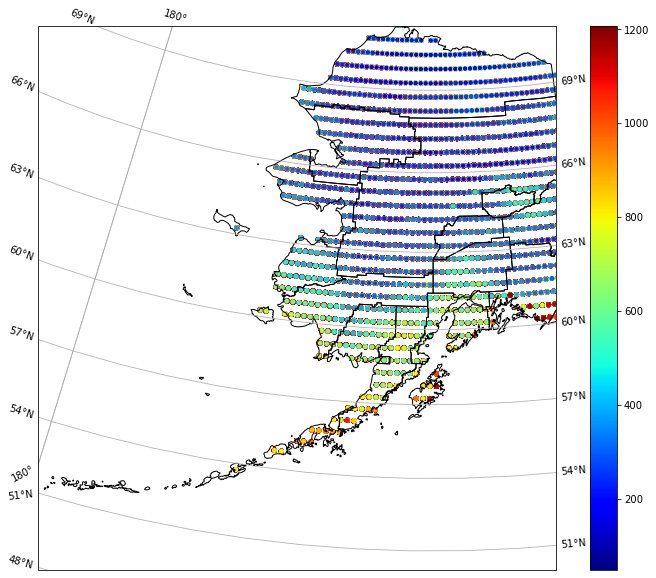

In [28]:
proj = ccrs.LambertConformal(central_longitude = -153, central_latitude = 65)
fig6 = plt.figure(figsize = (12,10))
ax = fig6.add_subplot(1,1,1, projection = proj)
ax.set_extent([-179,-145,50,70],ccrs.Geodetic())
ax.add_feature(USCOUNTIES.with_scale('5m'))
at = ax.scatter(DataAA.lon, DataAA.lat, c = vpr, cmap = 'jet', transform = ccrs.PlateCarree(), s=(DataAA.Vapor_Pressure**.2)**2)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(at, ax=ax)

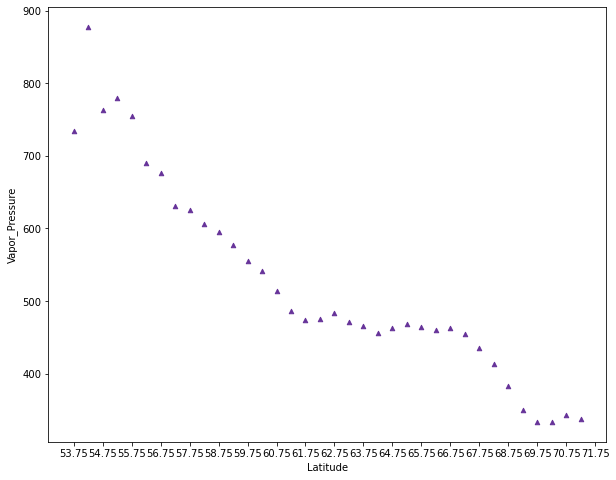

In [29]:
ax = plt.gca()
plt.xticks(np.arange(min(DataA2['lat']), max(DataA2['lat'])+1))
DataA2.plot(kind='scatter',x='lat',y='Vapor_Pressure', color='rebeccapurple', marker = '^',ax=ax, figsize = (10,8))
plt.xlabel("Latitude")
plt.show()

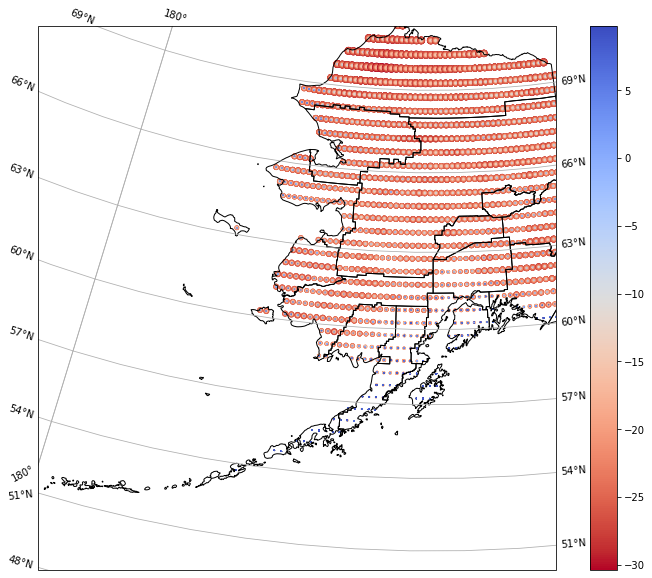

In [30]:
proj = ccrs.LambertConformal(central_longitude = -153, central_latitude = 65)
fig7 = plt.figure(figsize = (12,10))
ax = fig7.add_subplot(1,1,1, projection = proj)
ax.set_extent([-179,-145,50,70],ccrs.Geodetic())
ax.add_feature(USCOUNTIES.with_scale('5m'))
at = ax.scatter(DataAA.lon, DataAA.lat, c = dew, cmap = 'coolwarm_r', transform = ccrs.PlateCarree(), s=abs(DataAA.Dewpoint/15)**6)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(at, ax=ax)

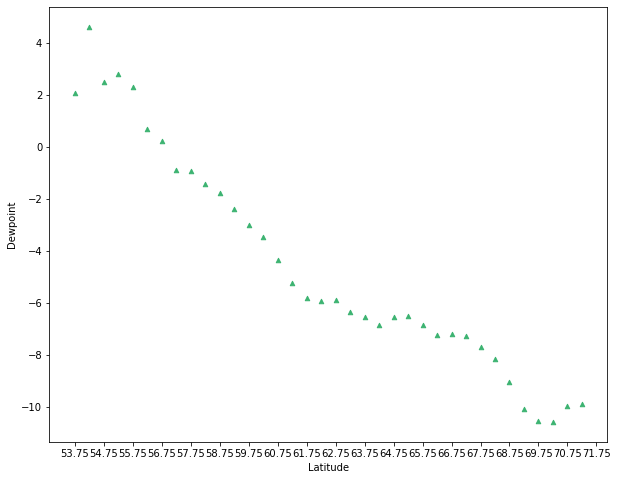

In [31]:
ax = plt.gca()
plt.xticks(np.arange(min(DataA2['lat']), max(DataA2['lat'])+1))
DataA2.plot(kind='scatter',x='lat',y='Dewpoint', color='mediumseagreen', marker = '^',ax=ax, figsize = (10,8))
plt.xlabel("Latitude")
plt.show()

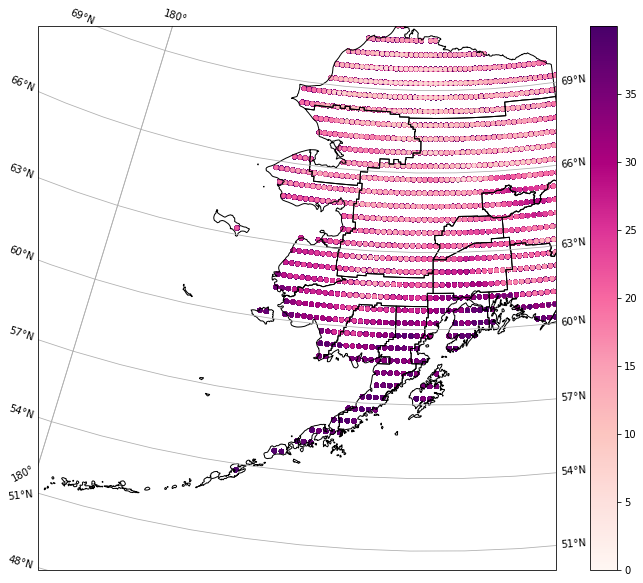

In [32]:
proj = ccrs.LambertConformal(central_longitude = -153, central_latitude = 65)
fig8 = plt.figure(figsize = (12,10))
ax = fig8.add_subplot(1,1,1, projection = proj)
ax.set_extent([-179,-145,50,70],ccrs.Geodetic())
ax.add_feature(USCOUNTIES.with_scale('5m'))
at = ax.scatter(DataAA.lon, DataAA.lat, c = hi, cmap = 'RdPu', transform = ccrs.PlateCarree(), s=(DataAA.Heat_Index**.125)*10)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
fig.colorbar(at, ax=ax)

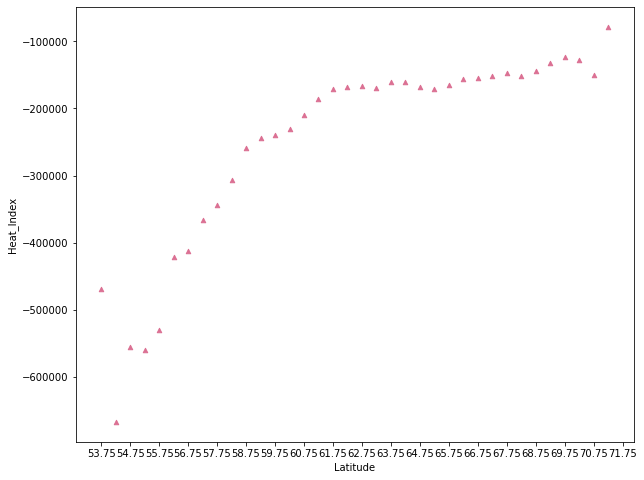

In [33]:
ax = plt.gca()
plt.xticks(np.arange(min(DataA2['lat']), max(DataA2['lat'])+1))
DataA2.plot(kind='scatter',x='lat',y='Heat_Index', color='palevioletred', marker = '^',ax=ax, figsize = (10,8))
plt.xlabel("Latitude")
plt.show()

In [34]:
Yearly_Mean = DataA.groupby([DataA['time'].dt.year]).mean('Avg_Temp')
Yearly_Mean = Yearly_Mean.rename_axis('Year')
ym = Yearly_Mean.reset_index()
Yearly_Mean

,Irradiation,Precipitation,Min_Temp,Max_Temp,Relative_Humidity,Solar_Radiation,Vapor_Pressure,Avg_Temp,Heat_Index,Dewpoint
Year,,,,,,,,,,
1997,172.596909,53.020317,-8.073056,1.728465,56.750839,9876.311523,414.592529,-3.172296,-150564.643012,-8.076612
1998,173.507996,54.305298,-8.020522,1.933585,55.379299,9826.472656,424.835846,-3.043468,-170036.014718,-8.248666
1999,169.774139,52.958744,-7.231281,2.191966,57.738621,9713.370117,443.201935,-2.519657,-166568.672342,-7.356213
2000,161.089355,50.938690,-7.900331,1.521550,57.136726,9123.962891,424.901825,-3.189390,-178152.514829,-8.008302
2001,164.927048,57.364655,-6.714179,2.584538,58.862396,9387.894531,461.138885,-2.064820,-185449.265280,-6.662370
...,...,...,...,...,...,...,...,...,...,...
2096,136.004501,48.277637,-2.632689,5.747839,62.388077,7426.732910,557.162659,1.557575,-206084.983823,-2.717665
2097,138.547424,43.269470,-3.467789,4.916746,61.533916,7518.334961,533.291931,0.724479,-201911.387196,-3.613546
2098,133.726715,47.904655,-3.042945,4.941271,63.141006,7324.241699,555.454041,0.949163,-206369.672299,-3.126620


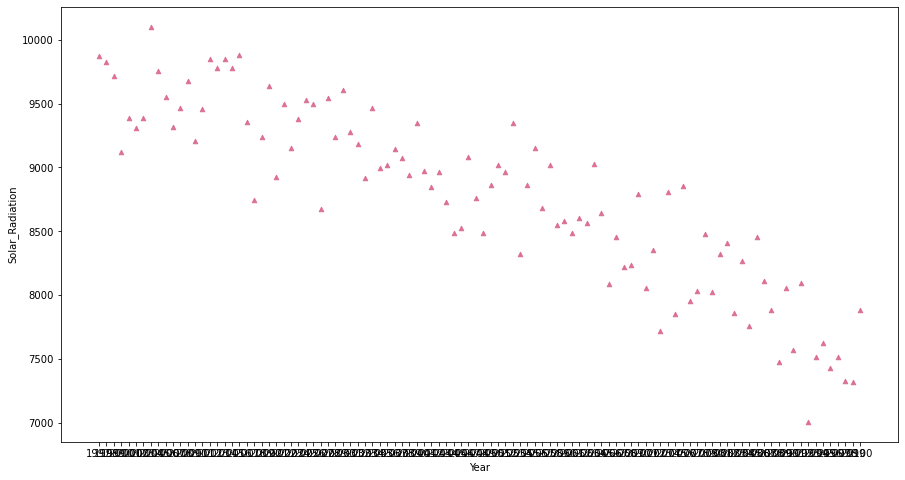

In [35]:
ax = plt.gca()
plt.xticks(np.arange(min(ym['Year']), max(ym['Year'])+1))
ym.plot(kind='scatter',x='Year',y='Solar_Radiation', color='palevioletred', marker = '^',ax=ax, figsize = (15,8))
plt.xlabel("Year")
plt.show()


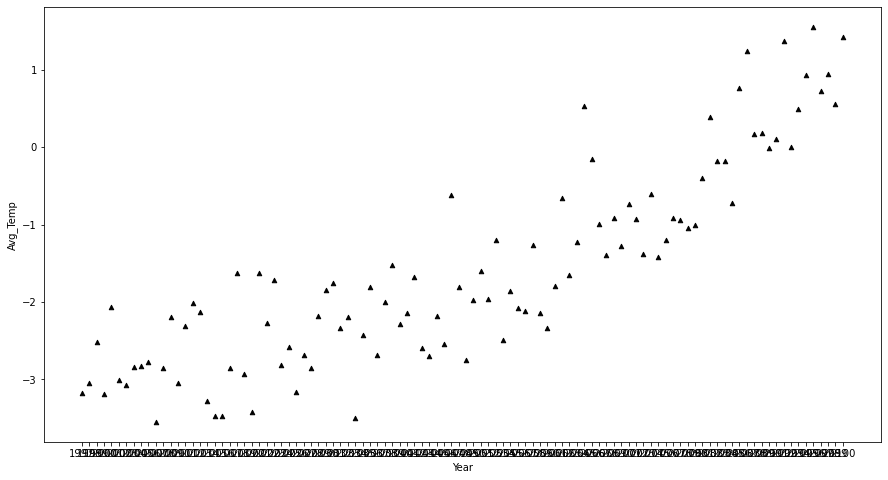

In [36]:
ax = plt.gca()
plt.xticks(np.arange(min(ym['Year']), max(ym['Year'])+1))
ym.plot(kind='scatter',x='Year',y='Avg_Temp', color='k', marker = '^',ax=ax, figsize = (15,8))
plt.xlabel("Year")
plt.show()


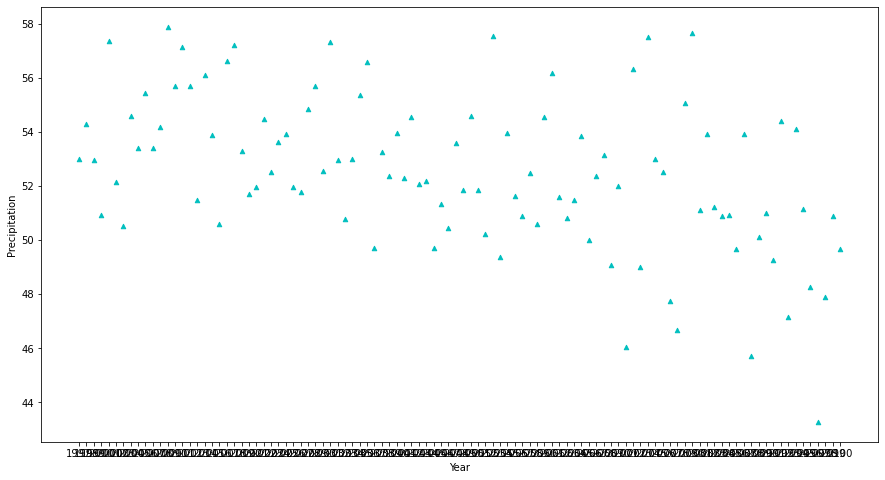

In [37]:
ax = plt.gca()
plt.xticks(np.arange(min(ym['Year']), max(ym['Year'])+1))
ym.plot(kind='scatter',x='Year',y='Precipitation', color='c', marker = '^',ax=ax, figsize = (15,8))
plt.xlabel("Year")
plt.show()


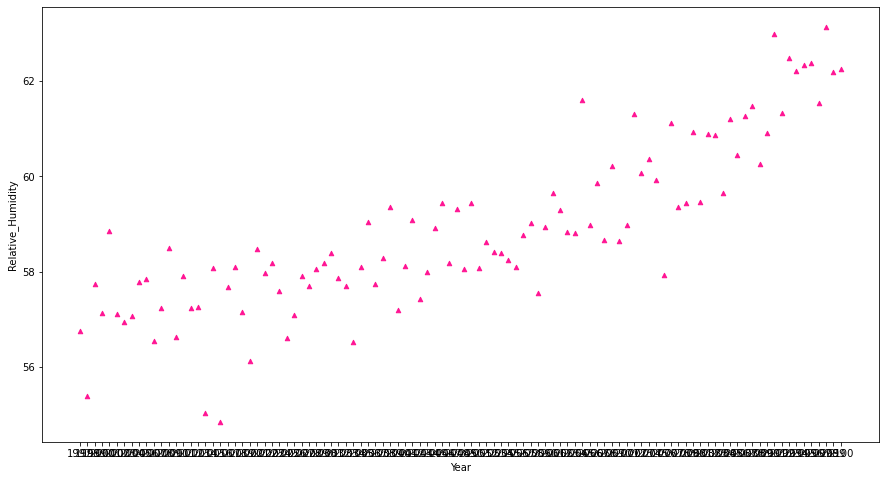

In [38]:
ax = plt.gca()
plt.xticks(np.arange(min(ym['Year']), max(ym['Year'])+1))
ym.plot(kind='scatter',x='Year',y='Relative_Humidity', color='deeppink', marker = '^',ax=ax, figsize = (15,8))
plt.xlabel("Year")
plt.show()


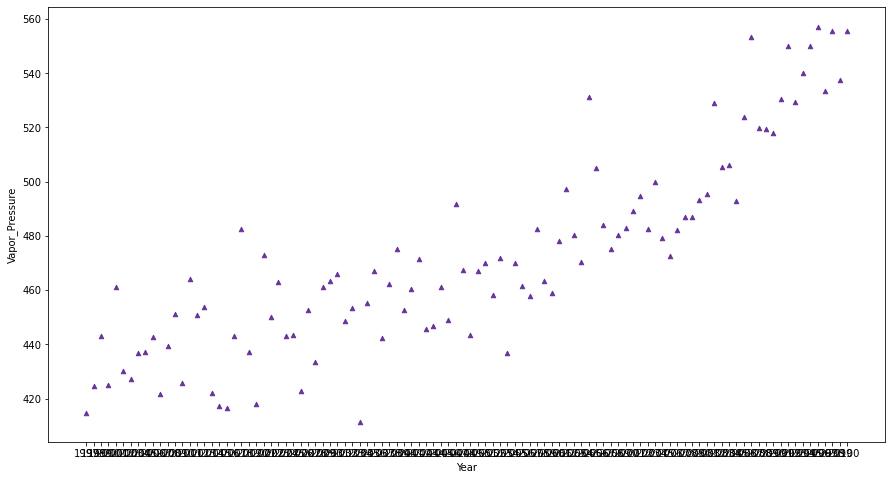

In [39]:
ax = plt.gca()
plt.xticks(np.arange(min(ym['Year']), max(ym['Year'])+1))
ym.plot(kind='scatter',x='Year',y='Vapor_Pressure', color='rebeccapurple', marker = '^',ax=ax, figsize = (15,8))
plt.xlabel("Year")
plt.show()


In [40]:
Monthly_Mean = DataA.groupby([DataA['time'].dt.month]).mean('Avg_Temp')
Monthly_Mean = Monthly_Mean.rename_axis('Month')
Monthly_Mean
mm = Monthly_Mean.reset_index()

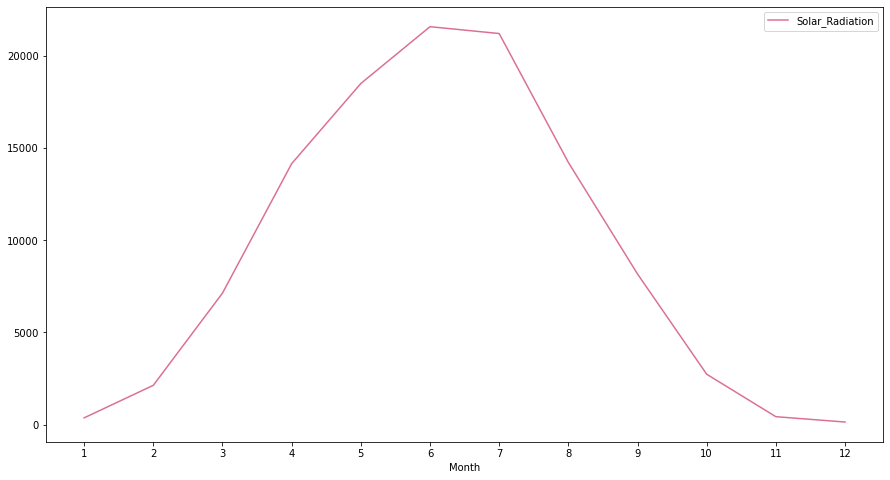

In [41]:
ax = plt.gca()
plt.xticks(np.arange(min(mm['Month']), max(mm['Month'])+1))
mm.plot(kind='line',x='Month',y='Solar_Radiation', color='palevioletred',ax=ax, figsize = (15,8))
plt.xlabel("Month")
plt.show()


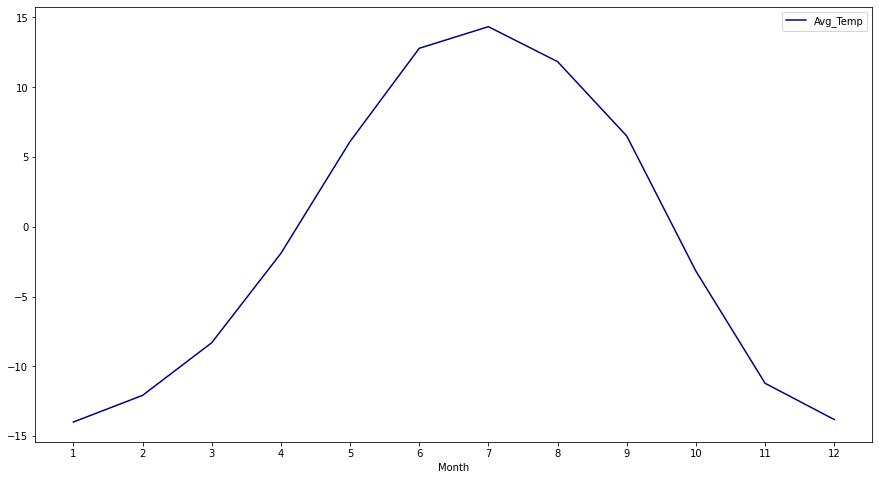

In [42]:
ax = plt.gca()
plt.xticks(np.arange(min(mm['Month']), max(mm['Month'])+1))
mm.plot(kind='line',x='Month',y='Avg_Temp', color='navy',ax=ax, figsize = (15,8))
plt.xlabel("Month")
plt.show()


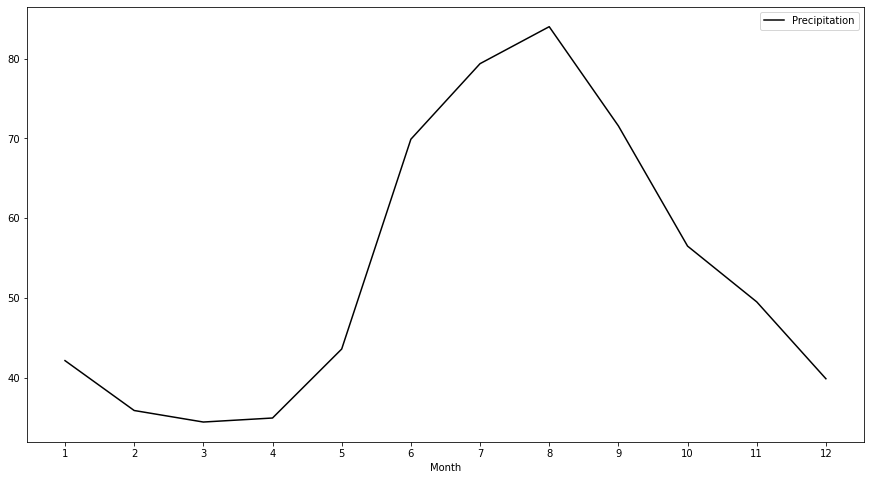

In [43]:
ax = plt.gca()
plt.xticks(np.arange(min(mm['Month']), max(mm['Month'])+1))
mm.plot(kind='line',x='Month',y='Precipitation', color='k',ax=ax, figsize = (15,8))
plt.xlabel("Month")
plt.show()


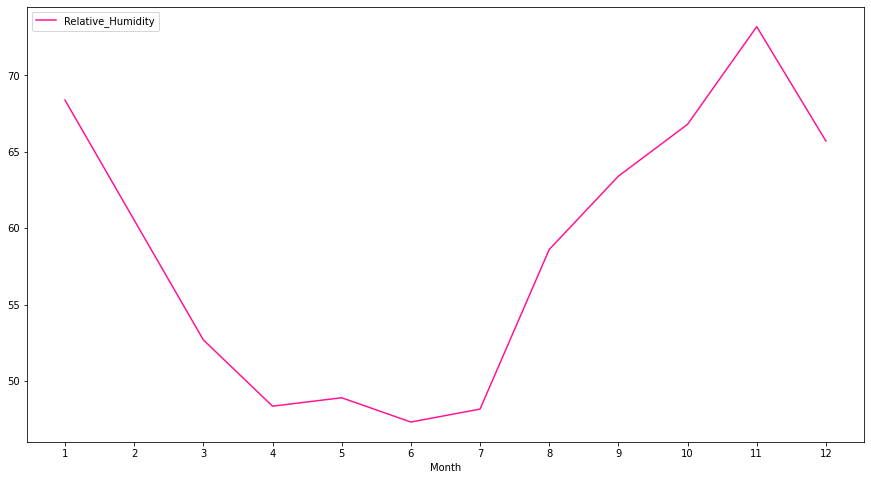

In [44]:
ax = plt.gca()
plt.xticks(np.arange(min(mm['Month']), max(mm['Month'])+1))
mm.plot(kind='line',x='Month',y='Relative_Humidity', color='deeppink',ax=ax, figsize = (15,8))
plt.xlabel("Month")
plt.show()


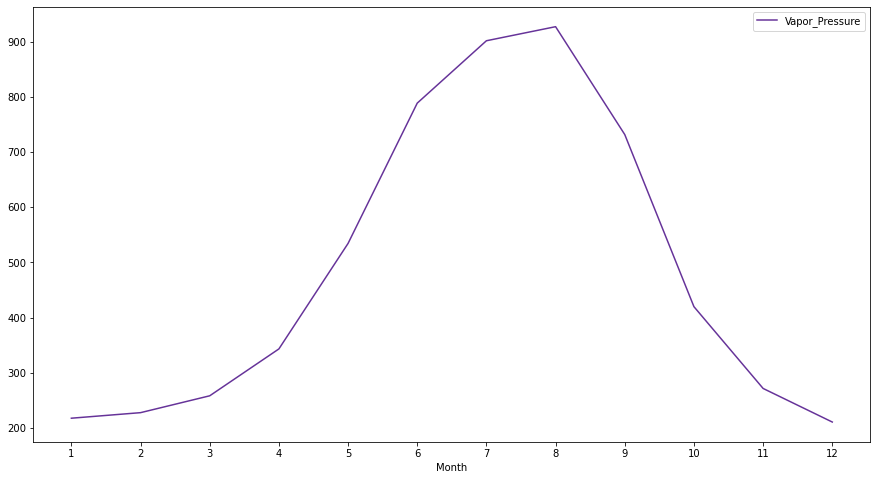

In [45]:
ax = plt.gca()
plt.xticks(np.arange(min(mm['Month']), max(mm['Month'])+1))
mm.plot(kind='line',x='Month',y='Vapor_Pressure', color='rebeccapurple',ax=ax, figsize = (15,8))
plt.xlabel("Month")
plt.show()
